# Import Essential Libraries

In [ ]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Import Plotly

In [ ]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [ ]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### Gensim package

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### pyLDAVis package

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


### NLTK Package

In [ ]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Mount Google Drive

In [ ]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Import Text Data

In [ ]:
df = pd.read_csv('Data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


,Article,Date,Heading,NewsType
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business
2691,strong>KARACHI: Karachi-based technology incub...,3/27/2017,Google powered Startup Weekend energizing prou...,business


# Tokenize: Parse each sentence to words/terms/tokens

In [ ]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

,Article,Date,Heading,NewsType,token
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[karachi, the, sindh, government, has, decided..."
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[hong, kong, asian, markets, started, on, an, ..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[hong, kong, hong, kong, shares, opened, perce..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[hong, kong, asian, markets, tumbled, tuesday,..."
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[new, york, us, oil, prices, monday, slipped, ..."


# Remove Stop words

## Define stop word removal functions

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV','VERB']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Using stop word removal functions

In [ ]:
display('before: ', df['token'])

'before: '

0       [karachi, the, sindh, government, has, decided...
1       [hong, kong, asian, markets, started, on, an, ...
2       [hong, kong, hong, kong, shares, opened, perce...
3       [hong, kong, asian, markets, tumbled, tuesday,...
4       [new, york, us, oil, prices, monday, slipped, ...
                              ...                        
2687    [strong, dubai, dubai, international, airport,...
2688    [strong, beijing, former, prime, minister, sha...
2689    [strong, washington, uber, has, grounded, its,...
2690    [strong, beijing, the, new, development, bank,...
2691    [strong, karachi, karachi, based, technology, ...
Name: token, Length: 2692, dtype: object

In [ ]:
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
display('after: ',df['token'])

'after: '

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

# Creating Corpus and Vocubulary

# (i) Making Word2Vec Model

## Printing the corpus

In [ ]:
# Create Corpus
texts = df['token']

display(texts)

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

## Training word2vec model

In [ ]:
w2vmodel = Word2Vec(texts, size=16, window=5, min_count=5, workers=4)

In [ ]:
list_1 = w2vmodel.wv.most_similar('government',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)

word_list_1 = []

for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

['waived', 'loan', 'finance', 'issue', 'waive', 'tax', 'new', 'sector', 'approve', 'project']


## Visualizing w2v

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      size_max=55, 
      text = labels,
      range_x=[-100, 100], 
      range_y=[-100,100],
      width = 2000,
      height = 2000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
# pass

In [ ]:
tsne_plot(w2vmodel)


## (iii) From the word2vec visualization, identify 5-word pairs that are close to each other and make sense. 

1. CRICKET, INTERNATIONAL, TEAM, PLAYER
2. GDP, REVISE
3. TEXT, ALIGN
4. GOVERNMENT, TAX
5. APPEAL, PROTEST
6. HIKE, INTEREST
7. ARM, BOWLER, SPINNER
8. RANK, TOP

# (ii), (iv) Word Cloud: 
The stopwords were already eliminated in the Remove Stop Words Cell

In [ ]:
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN'])

In [ ]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('year', 3552), ('percent', 3286), ('price', 1831), ('market', 1796), ('oil', 1784), ('team', 1481), ('test', 1391), ('month', 1365), ('time', 1346), ('match', 1266), ('week', 1239), ('wicket', 1203), ('day', 1162), ('country', 1159), ('world', 1132), ('government', 908), ('player', 891), ('rate', 870), ('ball', 844), ('dollar', 789), ('game', 738), ('cricket', 728), ('point', 727), ('growth', 684), ('economy', 660), ('trade', 633), ('play', 633), ('run', 626), ('barrel', 624), ('end', 623), ('score', 615), ('lead', 605), ('side', 594), ('increase', 588), ('level', 578), ('report', 536), ('cent', 535), ('production', 534), ('number', 533), ('demand', 525), ('investor', 509), ('share', 495), ('supply', 493), ('record', 490), ('tournament', 489), ('company', 487), ('rise', 486), ('sector', 473), ('analyst', 473), ('export', 457), ('start', 456), ('interest', 450), ('fall', 447), ('group', 446), ('output', 444), ('people', 428), ('win', 427), ('gold', 425), ('stock', 424), ('policy', 421

(-0.5, 1599.5, 499.5, -0.5)

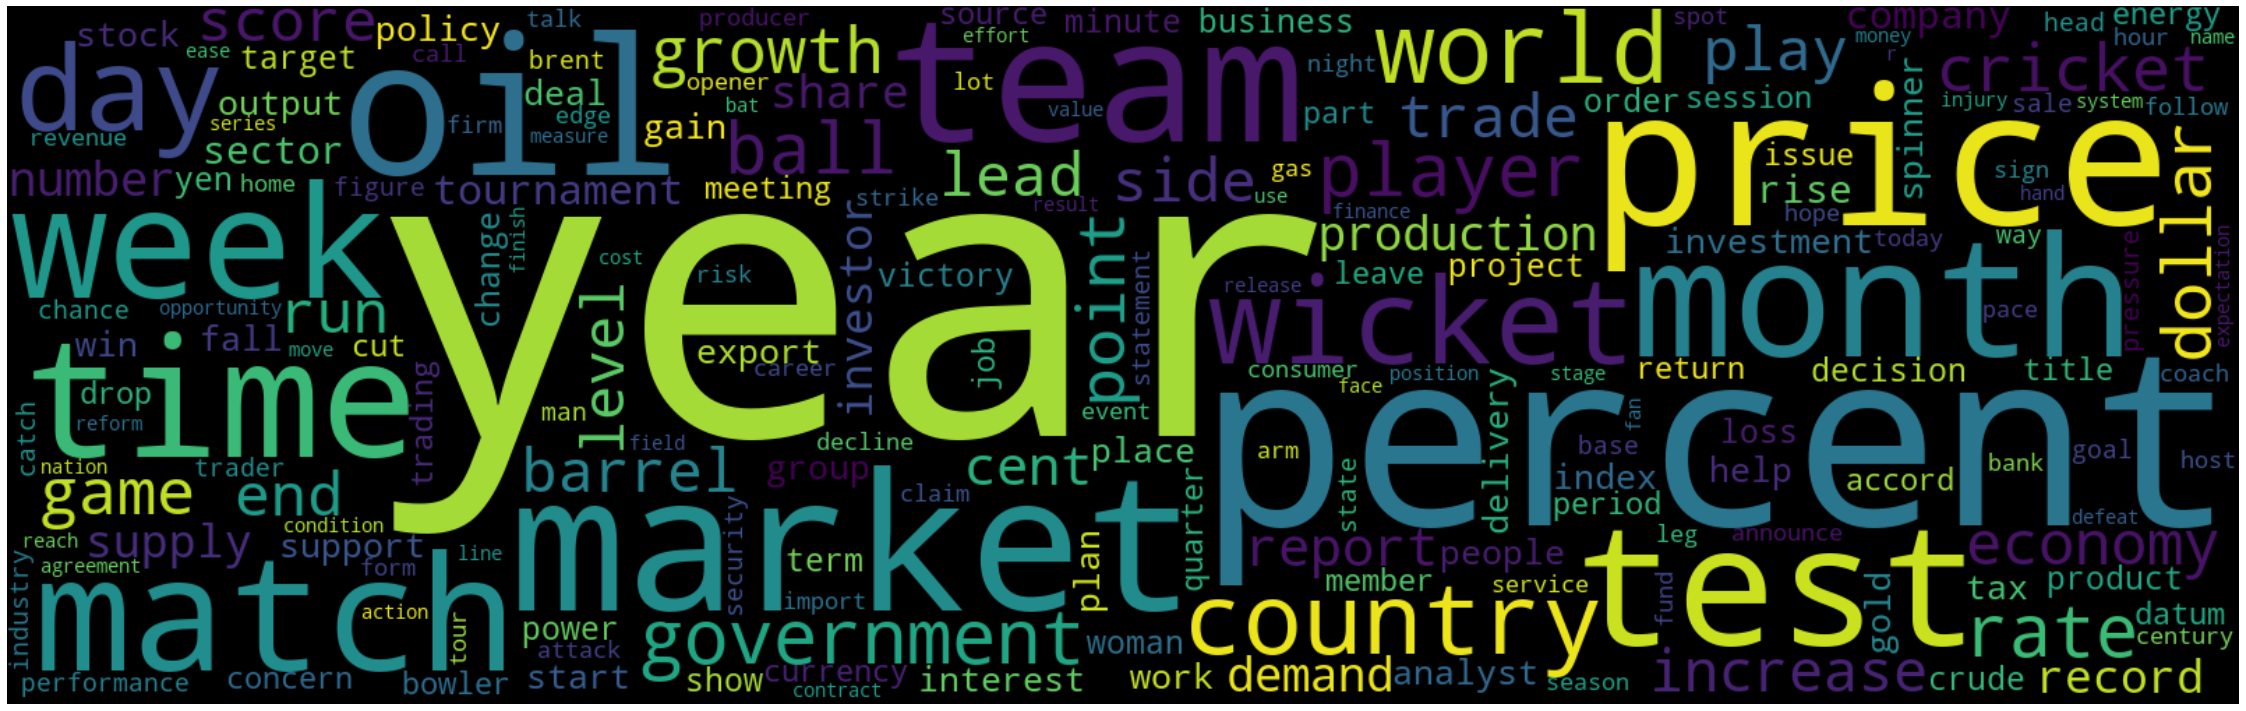

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=500)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In the beginning, I plotted the wordcloud keeping all four POS Tags, after which I found the most frequent words to be: 
## say, year, strong, percent, first, last 
This did not say much about the dataset as in the major topics covered in the news articles. To find a better understanding I only considered the nouns after which the most frequent words were:
## year, percent, oil, price, market, team, wicket, match, government, rate, growth, economy. 
With this we can conclude that the news article might have a lot of news about cricket, government, oil prices, economy. 


In [ ]:
df[df.Article.str.contains("wicket")]['Article'].count()

506

In [ ]:
df[df.Article.str.contains("year")]['Article']

1       HONG KONG: Asian markets started 2015 on an up...
2       HONG KONG:  Hong Kong shares opened 0.66 perce...
3       HONG KONG: Asian markets tumbled Tuesday follo...
4       NEW YORK: US oil prices Monday slipped below $...
5       New York: Oil prices tumbled Tuesday to fresh ...
                              ...                        
2684    strong>LONDON: Arcelik, the home appliances ar...
2685    strong>RIYADH/DUBAI: Saudi Arabia plans to tig...
2687    strong>DUBAI: Dubai International Airport and ...
2690    strong>BEIJING: The New Development Bank plans...
2691    strong>KARACHI: Karachi-based technology incub...
Name: Article, Length: 1455, dtype: object